## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

### Nome: Daniel Guarino

### Resumo do projeto:

Neste projeto utilizei um script SQL no dbeaver para obter somente as colunas de interesse, para obter um arquivo .csv mais leve, que carregue menos a memória RAM do computador e consequentemente seja mais rápido no momento de abrir os dados no Pandas. Com isso iniciamos o projeto retirando os dados ausentes do dataset, que correspondem aos estudantes que nao realizaram todos os exames da prova do enem em 2017. Essa análise aborda somente os alunos que realizaram ao menos as provas de Ciencias Naturais, Ciencias Humanas, Matemática, Linguagens e Códigos e a Redação, que possui a nota avaliada através de 5 componentes. Em seguida geramos a variável `nota_total` que é a soma da nota em cada uma das provas avaliadas no projeto. Com isso geramos vários modelos de regressão com o intuito de predizer a nota total do aluno. Em seguida fazemos uma modifição na variável alvo para obter o percentil das 25% melhores notas dos estudantes, assim transformamos um problema que inicialmente era de regressão em um problema de classificação, com o objetivo de identificar se com as notas das provas o estudante está ou não entre estes 25%. Para isso foram gerados diversos modelos de baseline utilizando o DummyClassifier da biblioteca Scikit Learn e heurísticas baseadas no conhecimento de negócio. Os modelos de classificação gerados utilizando validação cruzada nas seguintes técnicas de machine learning: SVM, Árvore de Decisão, Floresta Aleatória, Ridge e Regressão Logística, sendo este último o que obteve o melhor resultado ao predizer se o estudante está ou não entre os 25% melhores com acurácia de 93,5%.

## Formação Machine Learning Alura - Dados do ENEM

Na formação de Machine Learning da www.alura.com.br vamos inicialmente analisar os dados do Enem 2017. O Enem é uma prova aplicada aos alunos que completam o ensino médio, usada como porta de entrada para diversas faculdades no Brasil. A prova é composta de 9 avaliações distintas: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e 5 competências ligadas a prova de redação.

Duas situações podem ser interessantes:

a) uma faculdade deseja dar bolsa de estudos para os e as melhores estudantes. Para isso não deseja exigir que as pessoas façam todas as partes da prova.
b) seria possível prever a nota dos alunos e alunas se eles fizerem somente parte da prova? Seja deixando em branco propositalmente parte dela, ou exigindo somente uma correção parcial da prova de redação, como por exemplo somente um ou dois componentes ao invés de 5?

As duas perguntas são resumidas em: será possível prever quem teria as melhores notas em todas as partes, somente tendo feito parte da prova?

Para responder essa pergunta tentaremos modelar os dados de duas formas diferentes.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [ ]:
import warnings
#warnings.simplefilter("once")
warnings.filterwarnings('ignore')

!pip install pandas=="0.24.2" --quiet
!pip install seaborn=="0.9.0" --quiet
!pip install scipy=="1.2.0" --quiet
!pip install yellowbrick=="0.9.0" --quiet
!pip install numpy=="1.16.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy
import yellowbrick
import numpy as np

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando yellowbrick %s" % yellowbrick.__version__)
print("Usando numpy %s" % np.__version__)

Usando pandas 1.1.5
Usando seaborn 0.11.0
Usando scipy 1.4.1
Usando yellowbrick 0.9.1
Usando numpy 1.19.4


In [3]:
# Vamos configurar o pandas para usar impressão de ponto flutuante com 3 casas decimais
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Pergunta: carregue os dados

- baixe os dados de 2017 em http://download.inep.gov.br/microdados/microdados_enem2017.zip
- salve o arquivo `DADOS/MICRODADOS_ENEM_2017.CSV` em um diretório chamado `input/MICRODADOS_ENEM_2017.CSV`
- leia esse arquivo com pandas na variável `enem`
- nem sempre um arquivo separado por vírgulas (csv) vem separado por vírgulas, use o argumento `sep=';'` para indicar que o arquivo usou `;` como separador
- nem sempre o arquivo vem com encoding UTF-8, use `encoding='iso-8859-1'` para indicar o encoding que foi utilizado no arquivo
- não carregue todas as colunas. Existem muitos dados que não utilizaremos em nosso estudo. Para isso utilize o parâmetro `usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5"]`
- imprima os 5 primeiros elementos

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd drive/MyDrive/Datasets/ENEM2017/

/content/drive/MyDrive/Datasets/ENEM2017


In [ ]:
# solução - obtenção dos dados
import zipfile
import requests
from io import BytesIO
import os

url = "http://download.inep.gov.br/microdados/microdados_enem2017.zip"

os.makedirs('input', exist_ok = True)

# requisiçao html para obter os dados do ENEM 2017
file_bytes = BytesIO(
    requests.get(url, stream = True).content
)

# extrair conteudo do arquivo zip
my_zip = zipfile.ZipFile(file_bytes)
my_zip.extractall('input')

del(file_bytes)

In [6]:
# abrir e exibir arquivo
enem = pd.read_csv('input/MICRODADOS_ENEM_2017.csv', 
                   sep = ';',
                   encoding='iso-8859-1',
                   usecols=["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_MT", 
                                "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", 
                                "NU_NOTA_COMP4", "NU_NOTA_COMP5"]                   
                  )
enem.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


In [7]:
print("%d elementos e %d colunas" % (enem.shape[0], enem.shape[1]))
if(enem.shape[0] != 6731341):
    print("ERRO! No conjunto de 2017 existem 6731341 dados")
if(enem.shape[1] != 9):
    print("ERRO! Carregue somente 9 colunas relativas as notas")

6731341 elementos e 9 colunas


In [8]:
enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731341 entries, 0 to 6731340
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   NU_NOTA_CN     float64
 1   NU_NOTA_CH     float64
 2   NU_NOTA_LC     float64
 3   NU_NOTA_MT     float64
 4   NU_NOTA_COMP1  float64
 5   NU_NOTA_COMP2  float64
 6   NU_NOTA_COMP3  float64
 7   NU_NOTA_COMP4  float64
 8   NU_NOTA_COMP5  float64
dtypes: float64(9)
memory usage: 462.2 MB


## Pergunta: abra o arquivo `DICIONARIO/Dicionário_Microdados_Enem_2017.xls`
- explore quais são as colunas que possuem as notas das 4 avaliações e das 5 componentes analisadas em redação
- crie uma lista chamada `todas_as_notas` com o nome dessas 9 colunas

### Colunas com as notas das 4 avaliações

- `NU_NOTA_CN`: Nota da prova de Ciências da Natureza
- `NU_NOTA_CH`: Nota da prova de Ciências Humanas
- `NU_NOTA_LC`: Nota da prova de Linguagens e Códigos
- `NU_NOTA_MT`: Nota da prova de Matemática

### Colunas com os 5 componentes analisados na redação

- `NU_NOTA_COMP1`: Nota da competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.

- `NU_NOTA_COMP2`: Nota da competência 2 - Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa.

- `NU_NOTA_COMP3`: Nota da competência 3 - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.

- `NU_NOTA_COMP4`: Nota da competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.

- `NU_NOTA_COMP5`: Nota da competência 5 - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos.

In [9]:
# solução
# abrir o arquivo excel
dicionario_dados = pd.read_excel('input/Dicionаrio_Microdados_Enem_2017.xlsx')

todas_as_notas = list(enem.columns)
todas_as_notas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5']

In [10]:
enem[todas_as_notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,445.400,589.000,621.500,465.500,140.000,120.000,120.000,100.000,80.000
1,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,604.000,610.400,563.900,591.200,140.000,120.000,140.000,100.000,80.000
4,482.100,569.200,570.800,584.600,140.000,120.000,120.000,120.000,80.000


## Pergunta: alguns alunos e alunas não vieram na prova e possuem valores vazios.

- Descarte todas as linhas que possuem valores inválidos
- Sobrescreva a variável `enem`
- Imprima as 5 primeiras notas de matemática (`MT`)

In [11]:
# solução
# quantidade de dados nulos por coluna
print('Dados Nulos Antes do Tratamento: ')
print(enem.isnull().sum())
print()
# sobrescrever a variável enem
enem = enem.dropna()

# conferir se os dados nulos foram descartados
print('Dados Nulos Depois do Tratamento: ')
print(enem.isnull().sum())

Dados Nulos Antes do Tratamento: 
NU_NOTA_CN       2293781
NU_NOTA_CH       2029913
NU_NOTA_LC       2029913
NU_NOTA_MT       2293781
NU_NOTA_COMP1    2029913
NU_NOTA_COMP2    2029913
NU_NOTA_COMP3    2029913
NU_NOTA_COMP4    2029913
NU_NOTA_COMP5    2029913
dtype: int64

Dados Nulos Depois do Tratamento: 
NU_NOTA_CN       0
NU_NOTA_CH       0
NU_NOTA_LC       0
NU_NOTA_MT       0
NU_NOTA_COMP1    0
NU_NOTA_COMP2    0
NU_NOTA_COMP3    0
NU_NOTA_COMP4    0
NU_NOTA_COMP5    0
dtype: int64


## Pergunta: analise a nota total

- a coluna `nota_total` deve ser a soma de todas as 9 notas
- imprima as 5 primeiras notas totais
- desenhe o histograma da nota total
- descreva a `nota_total` em termos de média, mediana e desvio padrão

In [12]:
# soluçao
nota_total = enem.sum(axis=1)

enem['nota_total'] = nota_total
enem['nota_total'].head()

0   2681.400
3   2949.500
4   2786.700
5   2795.000
6   2858.500
Name: nota_total, dtype: float64

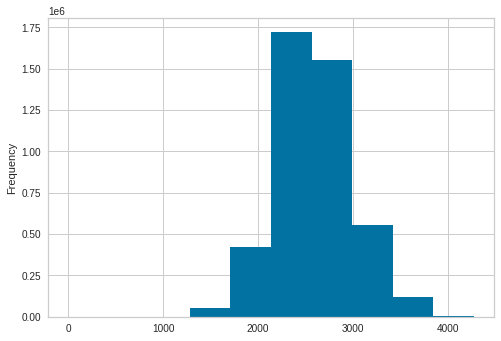

In [13]:
# solução histograma e descrição
enem.nota_total.plot(kind='hist')

## Pergunta: extraia 1% dos dados para explorarmos

- utilize o seed de aleatoriedade 745
- use a função `sample` para extrair 1% dos dados em uma variável chamada `enem_eda`
- plote o histograma de `enem_eda`
- descreva a `nota_total` desse sample de 1%
- a média, mediana e desvio padrão de nosso sample parecem representar o conjunto total?

Enem EDA sampling tem a distribuição
count   44268.000
mean     2594.186
std       396.483
min         0.000
25%      2330.475
50%      2572.800
75%      2841.625
max      4198.900
Name: nota_total, dtype: float64


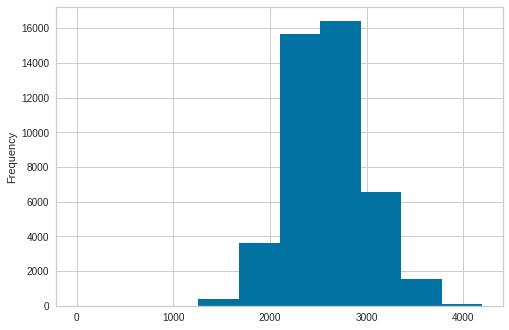

In [14]:
import matplotlib.pyplot as plt

# solução sua função de sampling
def eda_sample(enem):
    # seed
    SEED = 745
    # 1% de sample em enem_eda
    enem_eda = enem.sample(frac=0.01, random_state=SEED)

    print("Enem EDA sampling tem a distribuição")
    # descreva a nota_total
    print(enem_eda.nota_total.describe())
    # plote o histograma da nota_total e mostre com plt.show()
    enem_eda.nota_total.plot(kind='hist')
    plt.show()

    return enem_eda

enem_eda = eda_sample(enem)

In [15]:
enem_eda.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
3066813,565.000,493.000,514.900,418.700,120.000,120.000,100.000,80.000,60.000,2471.600
249978,560.300,509.300,466.100,652.200,120.000,120.000,120.000,140.000,120.000,2807.900
2399891,497.600,547.100,539.900,532.700,120.000,100.000,80.000,120.000,40.000,2577.300
3959805,600.600,632.300,647.300,578.500,160.000,120.000,140.000,160.000,160.000,3198.700
5505273,554.200,458.700,419.900,374.900,120.000,80.000,120.000,80.000,40.000,2247.700


In [16]:
enem_eda.shape

(44268, 10)

## Pergunta: analise a correlação entre as notas

- inclua a `nota_total` a `todas_as_notas`
- analise a correlação entre as variáveis contidas em todas as notas (uma tabela 10x10)

In [17]:
# solução
correlacoes = enem_eda.corr()
correlacoes

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
NU_NOTA_CN,1.000,0.610,0.568,0.553,0.342,0.317,0.386,0.379,0.350,0.731
NU_NOTA_CH,0.610,1.000,0.707,0.571,0.396,0.357,0.436,0.425,0.391,0.792
NU_NOTA_LC,0.568,0.707,1.000,0.547,0.443,0.371,0.458,0.448,0.398,0.777
NU_NOTA_MT,0.553,0.571,0.547,1.000,0.361,0.330,0.397,0.389,0.352,0.763
NU_NOTA_COMP1,0.342,0.396,0.443,0.361,1.000,0.771,0.832,0.862,0.594,0.726
NU_NOTA_COMP2,0.317,0.357,0.371,0.330,0.771,1.000,0.859,0.795,0.634,0.694
NU_NOTA_COMP3,0.386,0.436,0.458,0.397,0.832,0.859,1.000,0.866,0.674,0.774
NU_NOTA_COMP4,0.379,0.425,0.448,0.389,0.862,0.795,0.866,1.000,0.653,0.760
NU_NOTA_COMP5,0.350,0.391,0.398,0.352,0.594,0.634,0.674,0.653,1.000,0.675
nota_total,0.731,0.792,0.777,0.763,0.726,0.694,0.774,0.760,0.675,1.000


In [18]:
if(correlacoes.shape != (10,10)):
    print("A matriz de correlação deveria ser entre 10 notas, totalizando 10 linhas por 10 colunas")

## Pergunta: analise a correlação da nota_total

- extraia somente a linha relativa a `nota_total`
- atribua essa tabela 1x10 a variável `correlacao_com_nota_total`
- plote um gráfico de barras horizontais com o valor da correlação de cada nota com `nota_total`
- o gráfico deve estar ordenado da correlação mais baixa no topo para a correlação mais alta no fim
- use o estilo branco de gráficos do seaborn: `sns.set(style="white")`

In [19]:
# solução: cálculo da tabela de correlação com todas as notas
correlacao_com_nota_total = enem_eda.corr()['nota_total'][:-1]

In [20]:
print(correlacao_com_nota_total)

NU_NOTA_CN      0.731
NU_NOTA_CH      0.792
NU_NOTA_LC      0.777
NU_NOTA_MT      0.763
NU_NOTA_COMP1   0.726
NU_NOTA_COMP2   0.694
NU_NOTA_COMP3   0.774
NU_NOTA_COMP4   0.760
NU_NOTA_COMP5   0.675
Name: nota_total, dtype: float64


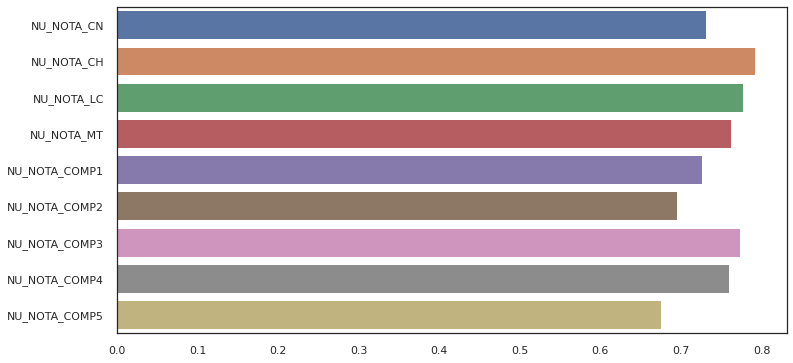

In [21]:
# solução gráfico
def plota_correlacao(dados):
    sns.set(style="white")
    plt.figure(figsize=(12, 6))
    # corr = dados.corr()["nota_total"].sort_values()
    sns.barplot(y=correlacao_com_nota_total.index, x=correlacao_com_nota_total.values)
    
plota_correlacao(correlacao_com_nota_total)

## Pergunta: tente um primeiro modelo

- Alguns estudiosos indicam que matemática e línguas formam a base para a educação
- Com base nesse conhecimento prévio, utilize de `enem_eda` as colunas `NU_NOTA_MT` e `NU_NOTA_LC` e `nota_total`
- Crie uma variável chamada `interesse` com esses dados
- Crie uma função chamada `split` que recebe esses dados
    - Ela usa o seed para números aleatórios do numpy 42367
    - Ela faz um `train_test_split` com porcentagem de treino e teste padrão.
    - Ela imprime o tamanho dos conjuntos resultantes de treino e teste
    

In [22]:
# solução: definindo interesse e imprimindo os 5 primeiros elementos
interesse = enem_eda[['NU_NOTA_MT', 'NU_NOTA_LC', 'nota_total']]
interesse.head()

,NU_NOTA_MT,NU_NOTA_LC,nota_total
3066813,418.700,514.900,2471.600
249978,652.200,466.100,2807.900
2399891,532.700,539.900,2577.300
3959805,578.500,647.300,3198.700
5505273,374.900,419.900,2247.700


In [23]:
# Solução: a função de split
from sklearn.model_selection import train_test_split


def split(dados):
    # seed
    SEED = 42367
    # train_test_split
    X = dados.drop('nota_total', axis=1)
    y = dados.nota_total.copy()
    train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=SEED)
    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Desvio padrão do conjunto de testes", test_y.std())
    return train_x, test_x, train_y, test_y

In [24]:
# Código pronto
train_x, test_x, train_y, test_y = split(interesse)
if(train_x.shape[1]!=2):
    print("*" * 80)
    print("Erro! Você deveria possuir somente duas colunas em X")
    print("*" * 80)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 2) (33201,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 396.6774613706172


## Pergunta: execute uma regressão linear

- defina a função `roda_regressao_linear` que recebe os 4 conjuntos de dados de treino e teste (x e y)
- treine um modelo `LinearRegression` do sklearn 
- calcule o R^2 score no conjunto de teste
- calcule o mean squared error (`mse`) e o mean absolute error (`mae`) do conjunto de teste
- imprima essas 3 métricas

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [26]:
# Solução: função para executar a regressão linear
def roda_regressao_linear(train_x, test_x, train_y, test_y):
    
    # crie o modelo, treine com os dados de treino
    model = LinearRegression()
    model.fit(train_x, train_y)
    
    # calcule a predição e os dois tipos de erros    
    test_pred = model.predict(test_x)
    mse = mean_squared_error(test_y, test_pred)
    mae = mean_absolute_error(test_y, test_pred)
    # calcule o r2_score com os dados de teste
    r2 = r2_score(test_y, test_pred)
    
    
    print("*" * 80)
    print("r2 score", r2)
    print("mse", mse)
    print("mae", mae)
    
    return model

In [27]:
# código pronto
roda_regressao_linear(train_x, test_x, train_y, test_y)

********************************************************************************
r2 score 0.769231147198833
mse 36308.89210227679
mae 142.102755998379


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Pergunta: analise o erro médio absoluto

- compare o erro médio absoluto com o desvio padrão dos estudantes do conjunto de testes
- o que você achou do erro encontrado com o uso desse modelo linear?

## Solução

O desvio padrão dos estudantes usado como baseline tem o valor de 396.677. Como o modelo gerado é do tipo regressão, queremos que o erro médio absoluto seja o mais próximo de 0. Sendo assim pode-se concluir que **o modelo baseline foi batido pelo primeiro modelo de regressão linear gerado** já que este obteve um erro médio absoluto de 142.102.

## Analisando o erro

Utilizando o módulo `yellowbrick` podemos rapidamente plotar os erros encontrados para cada estudante. No eixo X estará a `nota_total` real, enquanto no eixo Y a `nota_total` prevista pelo modelo. Quanto mais próxima da diagonal de identidade (x=y), mais correta a previsão do modelo.

Quanto menor o mean absolute error menor, mais próximo da diagonal será o modelo linear.

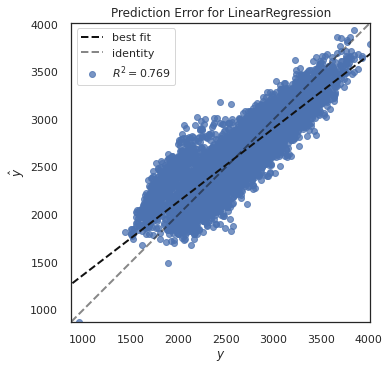

In [28]:
# código pronto
from yellowbrick.regressor import PredictionError

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Analisando o erro

Outra maneira importante de analisar o erro é ver a distribuição do resíduo, "o quão errado" nosso modelo está para os diversos valores previstos. No eixo X temos o valor previsto pelo modelo, enquanto no eixo Y o erro dessa previsão (os resíduos).

Um modelo razoável que captura a relação entre as variáveis de X e a variável dependente y comete erros de maneira "normal", isto é, seus resíduos devem seguir uma distribuição normal, mostrando não haver uma tendência para erros maiores ou menores em determinadas situações.

No gráfico a seguir você verá que a distribuição dos resíduos (gráfico da direita) se assemelham ao de uma normal.

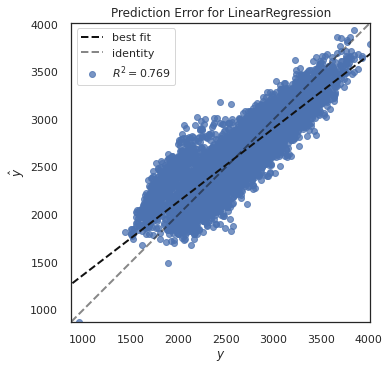

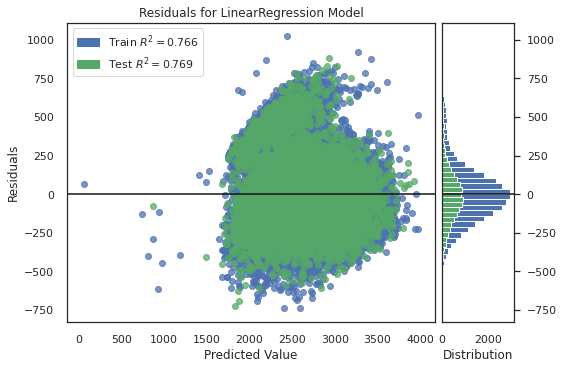

In [29]:
# código pronto
from yellowbrick.regressor import ResidualsPlot

def visualiza_erros(train_x,train_y,test_x,test_y):
    visualizer = PredictionError(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()
    
    visualizer = ResidualsPlot(LinearRegression())
    visualizer.fit(train_x, train_y)
    visualizer.score(test_x, test_y)
    visualizer.poof()

visualiza_erros(train_x,train_y,test_x,test_y)

## Explorando combinações de features

Ainda nessa fase de exploração escolhemos um conjunto de features (matemática e línguas) para tentar prever a nota final. Mas sabemos da correlação das variáveis de nota com a nota total que algumas possuem uma correlação maior do que outras.

De maneira análoga ao código anterior execute o modelo linear para diversas combinações de notas que julgar pertinente.

Para cada conjunto de notas que julgar pertinente:
- escolha as colunas e crie a variável `interesse` com elas
- invoque o `split` do `interesse`
- aplique a `run_linear_regression`
- aplique a `visualiza_erros`

Dentre os modelos a testar, verifique alguns importantes:
- com todas as 9 notas, o modelo é capaz de errar pouco? afinal a nota total é uma combinação linear de todas as 9 notas
- com 8 notas, qual o erro mínimo?
- com 1, 2 ou 3 notas que você julgar que faz sentido, quais erros encontra?

In [30]:
# código pronto
def regressao_completa_para(notas):
    interesse = enem_eda[notas]
    train_x, test_x, train_y, test_y = split(interesse)
    model = roda_regressao_linear(train_x, test_x, train_y, test_y)
    visualiza_erros(train_x,train_y,test_x,test_y)

In [31]:
todas_as_notas = list(enem_eda.columns)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 9) (33201,) (11067, 9) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP1'
 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 1.0
mse 1.924445000606224e-25
mae 3.445429237537726e-13


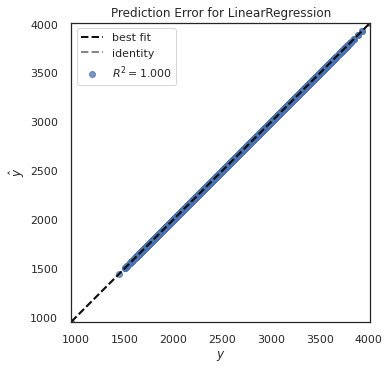

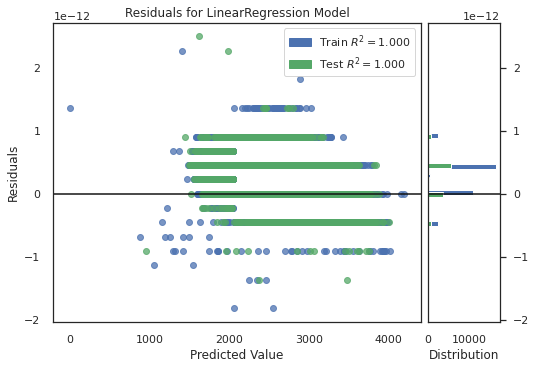

In [32]:
# solução 1: teste com todas as notas
# crie várias células com as combinações que julgar necessárias invocando sempre `regressao_completa_para`
# invoque ela com as notas que deseja analisar *E* a nota_total
modelo_1 = regressao_completa_para(todas_as_notas)


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 4) (33201,) (11067, 4) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH' 'NU_NOTA_LC' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.8475200762655193
mse 23991.00672138306
mae 109.06531946670808


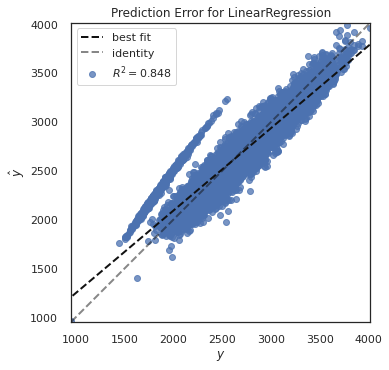

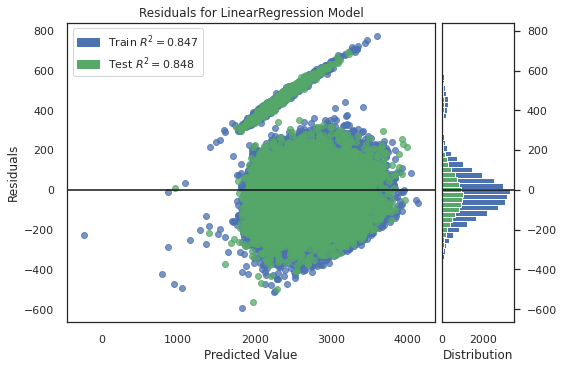

In [33]:
# solução 2: teste outra combinação
# usando as colunas com as notas de ciencias naturais (NU_NOTA_CN), ciencias humasnas (NU_NOTA_CH),
# linguagens e códigos (NU_NOTA_LC) e matemática (NU_NOTA_MT)
colunas_2 = ['NU_NOTA_CN', 'NU_NOTA_CH',  'NU_NOTA_LC',  'NU_NOTA_MT', 'nota_total']
modelo_2 = regressao_completa_para(colunas_2)


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 5) (33201,) (11067, 5) (11067,)
Usando colunas ['NU_NOTA_COMP1' 'NU_NOTA_COMP2' 'NU_NOTA_COMP3' 'NU_NOTA_COMP4'
 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.669947480117117
mse 51930.06416181119
mae 183.51132561008174


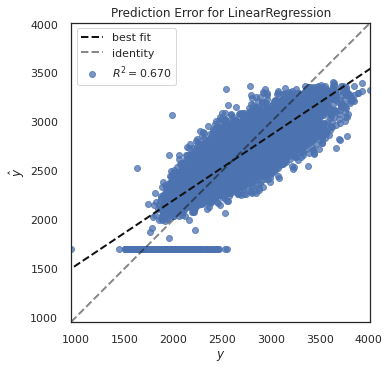

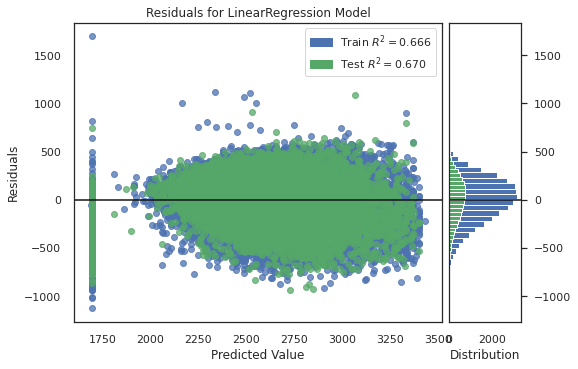

In [34]:
# solução 3: teste outra combinação
# agora com as notas dos componentes da redação (NU_)
colunas_3 = ['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'nota_total']
modelo_3 = regressao_completa_para(colunas_3)

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 1) (33201,) (11067, 1) (11067,)
Usando colunas ['NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.58244416791283
mse 65697.72943748323
mae 197.63243402264334


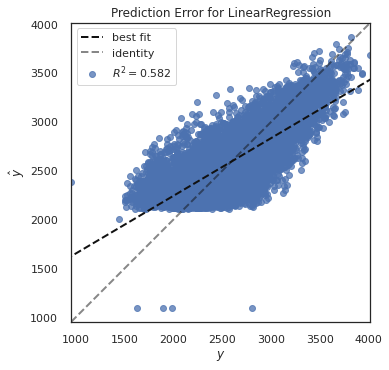

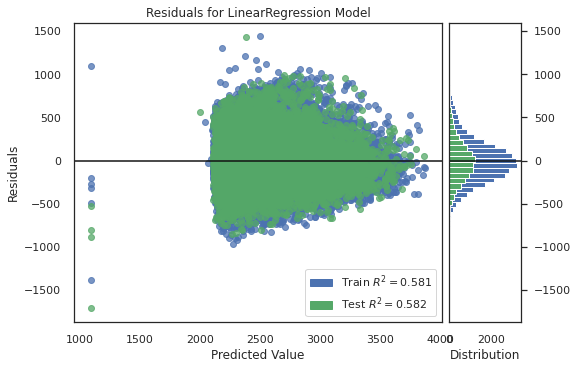

In [35]:
# solução 4: teste outra combinação
# usar somente a nota da prova de matemática NU_NOTA_MT
colunas_4 = ['NU_NOTA_MT', 'nota_total']
modelo_4 = regressao_completa_para(colunas_4)


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 2) (33201,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_LC'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.769231147198833
mse 36308.89210227679
mae 142.102755998379


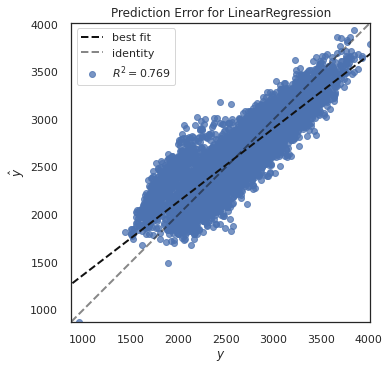

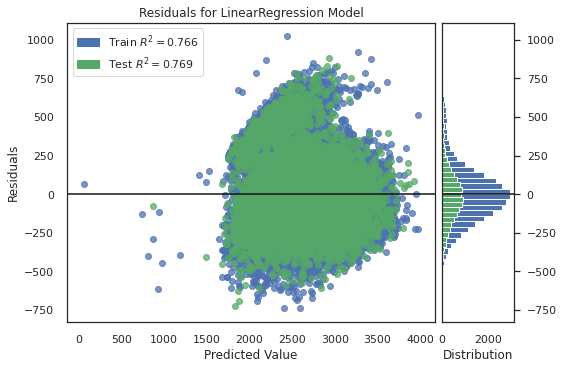

In [36]:
# solução 5: teste outra combinação
# agora com a nota da prova de matemática (NU_NOTA_MT) e linguagens e códigos (NU_NOTA_LC)
colunas_5 = ['NU_NOTA_MT', 'NU_NOTA_LC', 'nota_total']
modelo_5 = regressao_completa_para(colunas_5)


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 2) (33201,) (11067, 2) (11067,)
Usando colunas ['NU_NOTA_CN' 'NU_NOTA_CH'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.7218118499097923
mse 43769.786967135515
mae 157.82170986827342


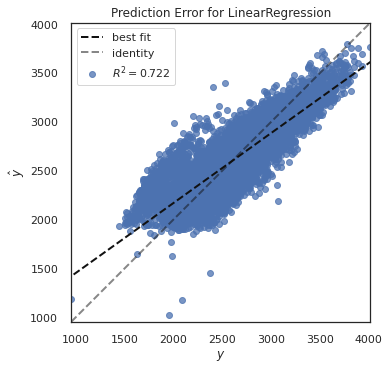

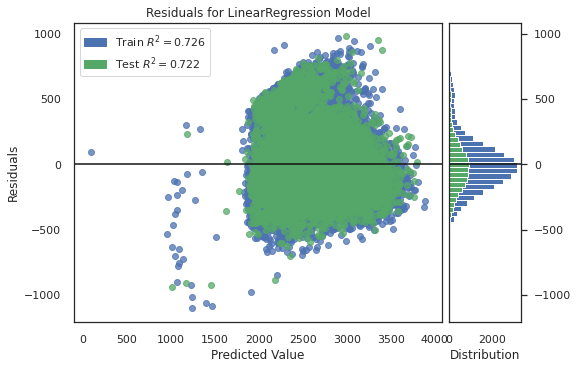

In [37]:
# solução 6: teste outra combinação
# nota das provas de ciencias naturais (NU_NOTA_CN) e ciencias humanas (NU_NOTA_CH)
colunas_6 = ['NU_NOTA_CN', 'NU_NOTA_CH', 'nota_total']
modelo_6 = regressao_completa_para(colunas_6)


********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 6) (33201,) (11067, 6) (11067,)
Usando colunas ['NU_NOTA_MT' 'NU_NOTA_COMP1' 'NU_NOTA_COMP2' 'NU_NOTA_COMP3'
 'NU_NOTA_COMP4' 'NU_NOTA_COMP5'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.8834131261611512
mse 18343.637676284852
mae 108.31387769548391


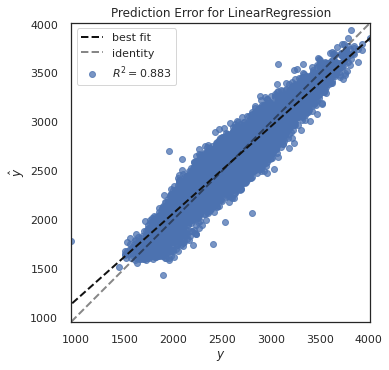

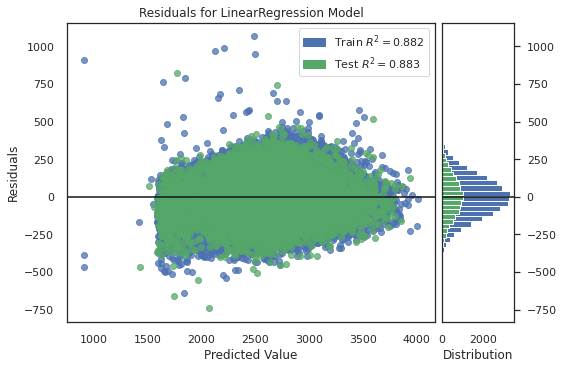

In [38]:
# solução 7: teste outra combinação
# notas das provas de matemática e componentes da redação
colunas_7 = ['NU_NOTA_MT', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'nota_total']
modelo_7 = regressao_completa_para(colunas_7)


## Pergunta: tente um modelo específico

- A prova de língua não envolve a criação de textos complexos, mas aborda a língua portuguesa
- A prova de matemática junto coma de língua apresenta um modelo razoável
- A prova de redação apresenta a oportunidade de criar textos complexos

Juntando essas três informações tente o mesmo processo de 4 passos para o modelo linear com `NU_NOTA_LC`, `NU_NOTA_COMP3` e `NU_NOTA_MT`. Analise o erro médio absoluto, o R^2 e a distribuição dos erros comparados aos modelos anteriores.

********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_COMP3' 'NU_NOTA_MT'] como X
Desvio padrão do conjunto de testes 396.6774613706172
********************************************************************************
r2 score 0.925075260832693
mse 11788.567812316252
mae 86.18740233062171


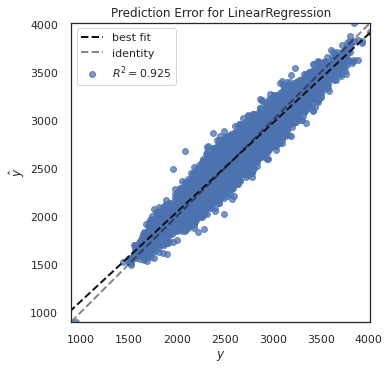

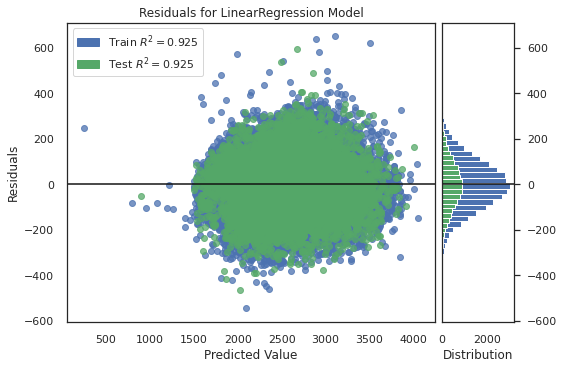

In [39]:
# solução
colunas_especifico = ['NU_NOTA_LC', 'NU_NOTA_COMP3', 'NU_NOTA_MT', 'nota_total']
modelo_especifico = regressao_completa_para(colunas_especifico)


### Análise

- O primeiro modelo usando as 9 variáveis obtivemos um modelo com R² do tipo "erro zero", o que indica **overfitting** como resultado. 

- Entre os 7 modelos gerados se destacam os modelos 2 e 7. No modelo 2 foram utilizadas todas as notas exceto as referentes aos componentes da redação. Este modelo obteve um R² de 0.84 e MAE de 109.09. No modelo 7 foram utilizadas somente as notas referentes aos 5 componentes da redação, obtendo R² de 0.88 e MAE de 108.31.

- O chamado modelo específico, que foi gerado a partir da nota da prova de linguagens e códigos, matemática e o componente 3 da redação melhorou ainda mais as métricas obtendo R² de 0.92 e MAE de 86.16.

## Escolhemos as features, qual o estimador ideal?

Vamos explorar mais ainda nosso conjunto de exploração. Vamos continuar com o conjunto de 3 notas, que seria uma possível conquista: somente com um componente de redação e 2 notas de provas seríamos capazes de prever razoavelmente a avaliação final de um aluno ou aluna.

Apesar dos gráficos anteriores indicarem que o modelo linear tem sido razoável para nossos dados, vamos testar outros estimadores. 

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_regressores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `LinearRegression`
    - `Lasso`
    - `Ridge`
    - `DecisionTreeRegressor`
    - `RandomForestRegressor`

In [40]:
# solução
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def gera_regressores():
    # gere os modelos em uma lista 
    linear = LinearRegression()
    lasso = Lasso()
    ridge = Ridge()
    arvore_decisao = DecisionTreeRegressor()
    floresta_aleatoria = RandomForestRegressor()

    modelos = [linear, lasso, ridge, arvore_decisao, floresta_aleatoria]

    return modelos

In [41]:
# teste
if(len(gera_regressores()) != 5):
    print("Erro!!! São 5 regressores que queremos testar!")

# Pergunta: crie uma função que escolhe parte dos dados

- implemente a função `escolhe_colunas`
- ela recebe o conjunto de dados e as colunas a filtrar
- escolha somente as colunas dos dados
- chame o `split` para esses dados filtrados, separando em treino e teste, x e y
- imprima o histograma de `train_y`
- plote o gráfico com `plt.show()`
- retorne `train_x, test_x, train_y, test_y` nessa ordem

In [42]:
# solução
def escolhe_dados(dados, colunas):
    # extraia as colunas
    df = dados[colunas]
    # faça o split
    X = df.drop('nota_total', axis=1)
    y = df.nota_total.copy()

    train_x, test_x, train_y, test_y = train_test_split(X, y)
    # plote o histograma de train_y
    train_y.plot(kind='hist')
    plt.show()
    
    return train_x, test_x, train_y, test_y

## Pergunta: treine e gere as métricas

- crie uma função para treinar e gerar as métricas de uma regressão

In [43]:
# solução:
import time
def treina_e_mede_regressor(modelo, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine seu modelo
    modelo.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic

    # calcule a previsão para test_x
    test_pred = modelo.predict(test_x)
    # calcule o mse
    mse = mean_squared_error(test_y, test_pred)
    # calcule o mae
    mae = mean_absolute_error(test_y, test_pred)
    print("Resultado", modelo, mse, mae)

    return mse, mae, tempo_de_treino

In [44]:
# código pronto
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

def analisa_regressao(dados):
    train_x, test_x, train_y, test_y = escolhe_dados(dados, ["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3", "nota_total"])
    
    resultados = []
    for modelo in gera_regressores():
        
        # crie um pipeline chamado pipe usando StandardScaler() e o modelo
        # use o make_pipeline ou crie um Pipeline
        pipe = make_pipeline(StandardScaler(), modelo)
        
        mse, mae, tempo_de_treino = treina_e_mede_regressor(pipe, train_x, test_x, train_y, test_y)
        
        resultados.append([modelo, pipe, tempo_de_treino, mse, mae])
        
    resultados = pd.DataFrame(resultados, columns=["modelo", "pipe", "tempo_de_treino", "mse", "mae"])
    return test_x, test_y, resultados

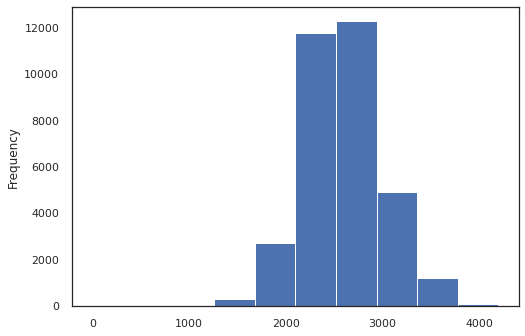

Resultado Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False) 11872.59224496636 86.64471415250402
Resultado Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False) 11875.853783966375 86.68937803198237
Resultado Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=Tr

,modelo,mse,mae,tempo_de_treino
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",11872.592,86.645,0.009
1,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",11875.854,86.689,0.007
2,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",11872.601,86.645,0.010
3,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",22638.528,119.049,0.169
4,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",13246.417,91.086,8.483


In [45]:
test_x, test_y, notas = analisa_regressao(enem_eda)
notas[["modelo", "mse", "mae", "tempo_de_treino"]]

## Resultado parcial

Somente nos nossos dados de exploração fomos capazes de perceber que um modelo de regressão linear parece ser capaz de explicar a variável `nota_total` em função de três variáveis. Por mais que a rede neural possa ter se saído um pouco melhor na métrica de `mean absolute error`, o treino é longo mesmo para 5% dos dados, que ainda estamos explorando.

Como uma regressão linear simples não possui hiper-parâmetros, nosso estudo de regressão vai parar por aqui. Possuímos indícios de que podemos usar um modelo de regressão em cima de 3 notas. Mas e no caso de identificarmos alunos e alunas para bolsa? Nesse caso não precisamos saber a nota final específica, mas sim se ela está no topo das pessoas que fizeram a prova. Isto é, o aluno ou aluna está ou não está no topo X% dos alunos?

Ao invés de usarmos uma regressão, tentaremos usar uma classificação! É comum reduzir um problema de regressão em classificação através do "encaixotamento" (binning) dos valores. Por exemplo, se o topo 25% dos alunos possuem nota maior que 2600, então quem tem menos fica com 0 e quem tem mais fica com 1. Poderíamos fazer também uma classificação entre os menores 25% (0), o bolo do meio (1) e o topo 25% (2). Como nosso cliente deseja entender o topo dos alunos e alunas vamos para a abordagem de 0 e 1.

## Pergunta: As notas de treino

- dado os últimos dados de teste gerados, gere um histograma da variável y (`nota_total` que é o `test_y`)

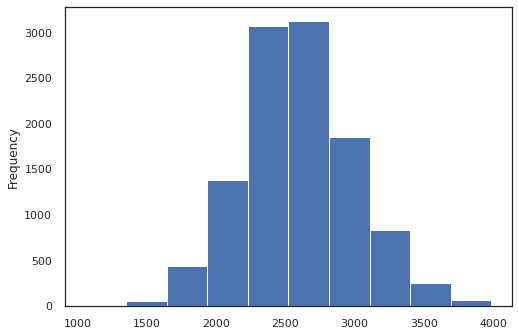

In [46]:
# solução: histograma
test_y.plot(kind='hist')
plt.show()

## Pergunta: criando as classes

- Crie uma função chamada `top_p` que recebe uma série de dados e um p que indica o quantil, por padrão 0.75
- A função devolve uma nova série
- O resultado são 0s para  quem está abaixo do quantil, e 1s para quem está acima

In [47]:
# solução
def top_p(serie, p = 0.75):
    # calcule o quantil p
    quant = serie.quantile(p)
    print("quantile encontrado", quant)
    # defina y como sendo uma serie de 1s e 0s. 1 se o valor da serie for maior que o quantil, 0 se menor
    y = []
    for valor in serie.values:
      if valor < quant:
        y.append(0)
      else:
        y.append(1)
    
    y = pd.Series(y, index=serie.index)
    return y

In [48]:
# teste do top 25%
top_25 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.75).values
if(not np.array_equal(top_25, [0,0,0,0,0,0,0,1,1,1])):
    print("Não retornou o top 25% corretamente, deveria ser ", top_25)

quantile encontrado 7.75


In [49]:
top_25

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [50]:
# teste do top 10%
top_10 = top_p(pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), p = 0.90).values
if(not np.array_equal(top_10, [0,0,0,0,0,0,0,0,0,1])):
    print("Não retornou o top 10% corretamente, deveria ser", top_10)

quantile encontrado 9.1


In [51]:
top_10

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

## Visualizando classes e features

O `yellowbrick` permite visualizar o balanço de suas classes. O código a seguir vai conferir e permitir visualizar que separamos 25% dos alunos e alunas:

In [52]:
# código pronto
y_top25 = top_p(test_y)
y_top25.mean()

quantile encontrado 2841.0


0.2500225896810337

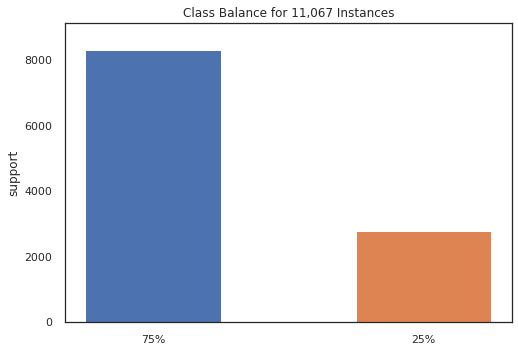

In [53]:
# código pronto
from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["75%", "25%"])
visualizer.fit(y_top25)
visualizer.poof()

## Para saber mais: agrupando

O `yellowbrick` possui uma função para visualizar possíveis binnings. O código a seguir mostra 4 sugestões de pontos para agrupamento. Não usaremos a sugestão do yellowbrick pois no nosso caso o cliente já definiu que queria os X% do topo.

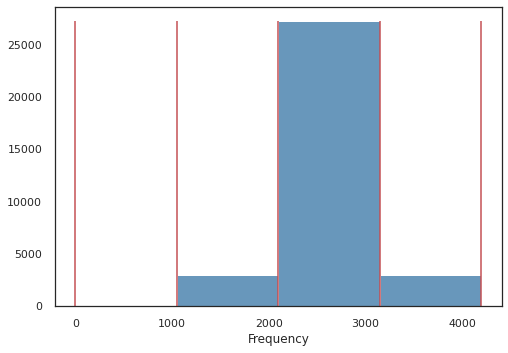

In [54]:
# código pronto
from yellowbrick.target import BalancedBinningReference

visualizer = BalancedBinningReference()
visualizer.fit(train_y)
visualizer.poof()

## O modelo completo para classificação

Vamos passar agora pelo mesmo processo de classificação.

## Pergunta: Prepare diversos estimadores

- Implemente a função `gera_classificadores` que retorna uma lista de estimadores
- Do sklearn coloque na lista:
    - `DummyClassifier` com a estratégia `most_frequent` (mais frequente) que será nosso baseline
    - `LogisticRegression`
    - `RidgeClassifier`
    - `DecisionTreeClassifier`
    - `RandomForestClassifier(n_estimators=10)`
    - `SVC`

In [55]:
# código pronto
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [56]:
# solução
def gera_classificadores():
    # defina seus modelos
    dummy = DummyClassifier(strategy='most_frequent')
    logistic = LogisticRegression()
    ridge = RidgeClassifier()
    decision_tree = DecisionTreeClassifier()
    floresta_aleatoria = RandomForestClassifier(n_estimators=10)
    svc = SVC()

    modelos = [dummy, logistic, ridge, decision_tree, floresta_aleatoria, svc]

    return modelos

In [57]:
# código pronto
if(len(gera_classificadores()) != 6):
    print("Erro!!! São 6 classificadores que queremos testar!")

## Pergunta: defina uma nova função de split, agora baseada nas classes

- crie a função `split_classe` que recebe os `dados`
- use `42367` como seed para o `numpy`
- X são todas as colunas exceto a coluna `top_p`
- y é a coluna `top_p`
- chame `train_test_split`
    - stratify é a coluna y
- imprima os tamanhos dos conjuntos
- imprima o número de colunas de X
- imprima a média de test_y
- retorne os conjuntos de treino e teste

In [58]:
def split_classificacao(dados):
    # faça o seed do numpy
    SEED = 42367
    np.random.seed(SEED)
    # defina X como todas as colunas de `dados` exceto top_p
    X = dados.drop('top_p', axis=1)
    # defina y como somente a coluna top_p
    y = dados.top_p.copy()
    # quebre em treino e teste, usando estratificação baseada em y
    train_x, test_x, train_y, test_y = train_test_split(X,y, random_state=SEED,stratify=y)

    print("*" * 80)
    print("Quebrando em treino (x,y) e teste (x,y)", train_x.shape, train_y.shape,test_x.shape, test_y.shape)
    print("Usando colunas %s como X" % str(train_x.columns.values))
    print("Média do conjunto de testes", test_y.mean())
    return train_x, test_x, train_y, test_y

## Testando sua função de split

In [59]:
# código pronto: teste
interesse = enem_eda[["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
interesse['top_p'] = top_p(interesse['nota_total'])
interesse = interesse[["top_p", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]

train_x, test_x, train_y, test_y = split_classificacao(interesse)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


In [60]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((33201, 3), (11067, 3), (33201,), (11067,))

## Pergunta: implemente o treino e o teste do classificador

In [61]:
# solução:
from sklearn.metrics import accuracy_score
import time
def treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y):
    tic = time.time()
    # treine o pipeline
    pipe.fit(train_x, train_y)
    tac = time.time()
    tempo_de_treino = tac - tic
    # calcule a accuracy_score
    test_pred = pipe.predict(test_x)
    accuracy = accuracy_score(test_y, test_pred)
    print("Resultado", nome, accuracy)

    return accuracy, tempo_de_treino

## Pergunta implemente a função de escolha de dados e split para classificação

In [62]:
# solução:
def escolhe_dados_para_classificacao(dados, colunas, p):
    interesse = dados[colunas]
    nota_total = dados.nota_total
    interesse['top_p'] = top_p(nota_total, p)

    colunas.remove("nota_total")
    interesse = interesse[[*colunas, "top_p"]]
    
    train_x, test_x, train_y, test_y = split_classificacao(interesse)
    train_y.hist()
    plt.show()
    return train_x, test_x, train_y, test_y

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


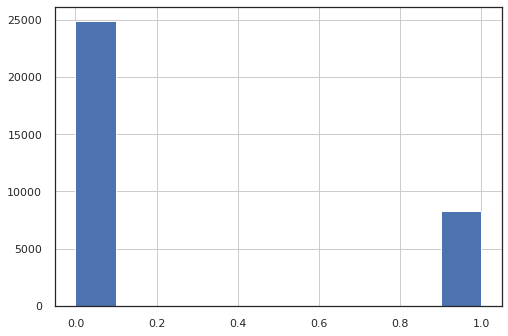

In [63]:
# testando a escolha
train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(enem_eda, ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"], p=0.75)

if(train_x.shape[1] != 3):
    print("*" * 80)
    print("Erro! Você deveria possuir somente três colunas em X")
    print("*" * 80)

if(test_y.mean() <= 0.24 or test_y.mean() >= 0.26):
    print("*" * 80)
    print("Erro! Você deveria capturar somente o top 25% e usar estratificação no split")
    print("*" * 80)
    

In [64]:
# código pronto
def analisa_classificacao(dados, p = 0.75):
    
    colunas = ["nota_total", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]
    train_x, test_x, train_y, test_y = escolhe_dados_para_classificacao(dados, colunas, p=p)
    
    resultados = []
    for modelo in gera_classificadores():
        nome = type(modelo).__name__
        pipe = make_pipeline(StandardScaler(), modelo)
        accuracy, tempo_de_treino = treina_e_mede_classificador(pipe, nome, train_x, test_x, train_y, test_y)
        resultados.append([nome, modelo, pipe, tempo_de_treino, accuracy])
        
    resultados = pd.DataFrame(resultados, columns=["tipo", "modelo", "pipe", "tempo_de_treino", "accuracy_score"])
    return test_x, test_y, resultados.set_index("tipo")


## Pergunta: rode a analisa_classificacao

- rode 6 vezes, cada uma em uma célular diferente, vamos ver o quão bem os modelos tentam prever o top X%
- queremos o top 25% (quantil/p=0.75), top 20%, top 10%, top 5% e top 1%
- queremos também rodar para as últimas 25% pessoas, isto é p=0.25

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


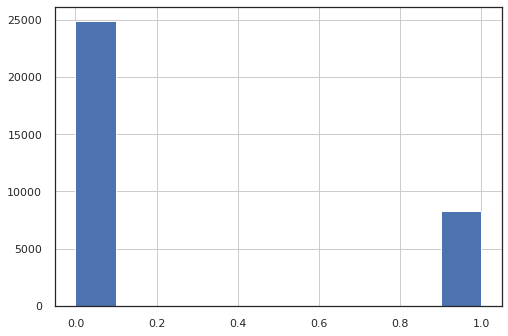

Resultado DummyClassifier 0.7499774103189663
Resultado LogisticRegression 0.9371103280021686
Resultado RidgeClassifier 0.9204843227613626
Resultado DecisionTreeClassifier 0.9050329809343092
Resultado RandomForestClassifier 0.9253636938646427
Resultado SVC 0.9374717628987078


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.008
LogisticRegression,0.937,0.076
RidgeClassifier,0.920,0.019
DecisionTreeClassifier,0.905,0.115
RandomForestClassifier,0.925,0.281
SVC,0.937,7.395


In [65]:
# solução top 25%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.75)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2915.7
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2000542152344809


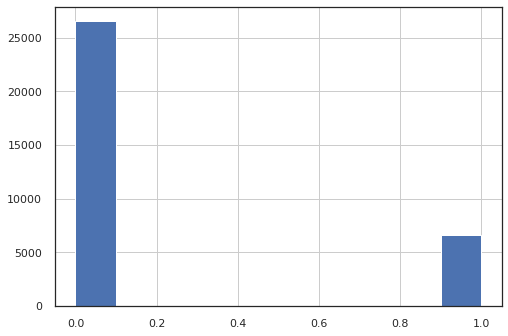

Resultado DummyClassifier 0.7999457847655191
Resultado LogisticRegression 0.9454233306225716
Resultado RidgeClassifier 0.9288876841059004
Resultado DecisionTreeClassifier 0.9210264751061715
Resultado RandomForestClassifier 0.9375621216228427
Resultado SVC 0.9455136893467064


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.800,0.008
LogisticRegression,0.945,0.073
RidgeClassifier,0.929,0.019
DecisionTreeClassifier,0.921,0.113
RandomForestClassifier,0.938,0.286
SVC,0.946,6.183


In [66]:
# solução top 20%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.80)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3119.0
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.10002710761724044


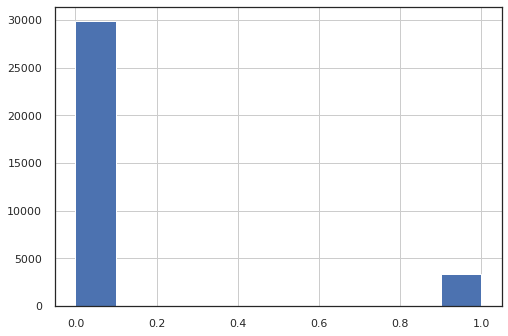

Resultado DummyClassifier 0.8999728923827596
Resultado LogisticRegression 0.9709044908285895
Resultado RidgeClassifier 0.9278937381404174
Resultado DecisionTreeClassifier 0.9563567362428842
Resultado RandomForestClassifier 0.9641275865184784
Resultado SVC 0.9705430559320503


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.900,0.008
LogisticRegression,0.971,0.081
RidgeClassifier,0.928,0.030
DecisionTreeClassifier,0.956,0.090
RandomForestClassifier,0.964,0.250
SVC,0.971,3.365


In [67]:
# solução top 10%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.90)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3290.7950000000005
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.04996837444655281


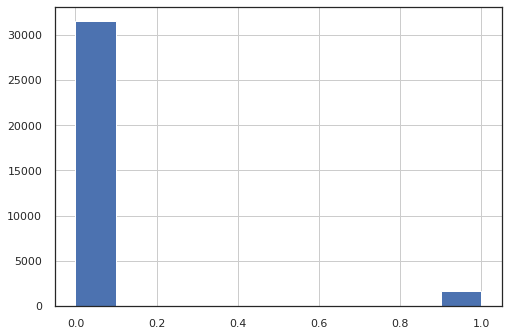

Resultado DummyClassifier 0.9500316255534472
Resultado LogisticRegression 0.9793078521731273
Resultado RidgeClassifier 0.9500316255534472
Resultado DecisionTreeClassifier 0.9719887955182073
Resultado RandomForestClassifier 0.9787656998283184
Resultado SVC 0.9793982108972621


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.950,0.007
LogisticRegression,0.979,0.088
RidgeClassifier,0.950,0.019
DecisionTreeClassifier,0.972,0.097
RandomForestClassifier,0.979,0.236
SVC,0.979,1.982


In [68]:
# solução top 5%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.95)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 3588.7
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.01002981837896449


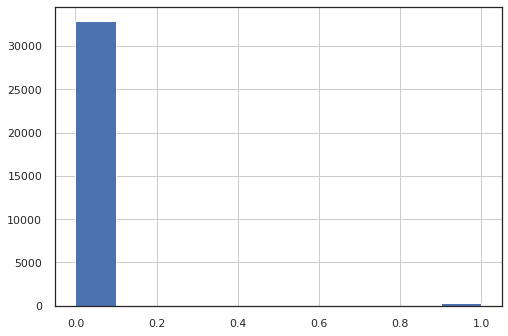

Resultado DummyClassifier 0.9899701816210356
Resultado LogisticRegression 0.9943074003795066
Resultado RidgeClassifier 0.9899701816210356
Resultado DecisionTreeClassifier 0.9913255624830577
Resultado RandomForestClassifier 0.9930423782416192
Resultado SVC 0.9942170416553718


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.990,0.008
LogisticRegression,0.994,0.109
RidgeClassifier,0.990,0.017
DecisionTreeClassifier,0.991,0.089
RandomForestClassifier,0.993,0.187
SVC,0.994,0.595


In [69]:
# solução top 1%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.99)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

quantile encontrado 2330.475
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.7499774103189663


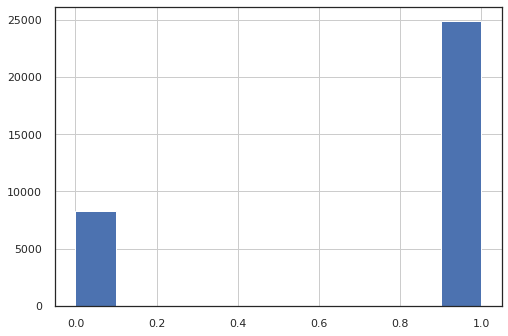

Resultado DummyClassifier 0.7499774103189663
Resultado LogisticRegression 0.9208457576579019
Resultado RidgeClassifier 0.9033161651757478
Resultado DecisionTreeClassifier 0.8887684105900425
Resultado RandomForestClassifier 0.9070208728652751
Resultado SVC 0.9225625734164633


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.007
LogisticRegression,0.921,0.065
RidgeClassifier,0.903,0.018
DecisionTreeClassifier,0.889,0.117
RandomForestClassifier,0.907,0.289
SVC,0.923,9.729


In [70]:
# solução bottom 25%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.25)
# rode a analisa_classificacao e armazene test_x, test_y e notas
notas[["accuracy_score", "tempo_de_treino"]]

## Escolhendo o top 25%

Dado o cenário de topo 25%, o DummyClassifier acertou 75% das vezes, errou 25%. O modelo que estamos criando conseguiria atingir no máximo esses 25% a mais de acerto (máximo de 100%). Se conferirmos que o modelo logístico acertou 93.7%, isso significa que 93.7% - 75% = 18.7%. Portanto do ganho máximo de 25% o modelo está acertando 18.7%, um total de 74.8% de ganho do potencial máximo de um modelo.

Por mais que pareça pouco, esses 18.7% representam quase 3/4 de todo o ganho potencial que um modelo pode ter.

Você pode fazer a mesma conta paa os outros ps, lembrando que essa não é uma métrica comum de se analisar. Na prática queremos entender agora como foi que o modelo errou. Ele errou os casos do bottom 75% e do top 25% igualmente? Ou errou mais em um dos dois casos?

quantile encontrado 2841.625
********************************************************************************
Quebrando em treino (x,y) e teste (x,y) (33201, 3) (33201,) (11067, 3) (11067,)
Usando colunas ['NU_NOTA_LC' 'NU_NOTA_MT' 'NU_NOTA_COMP3'] como X
Média do conjunto de testes 0.2500225896810337


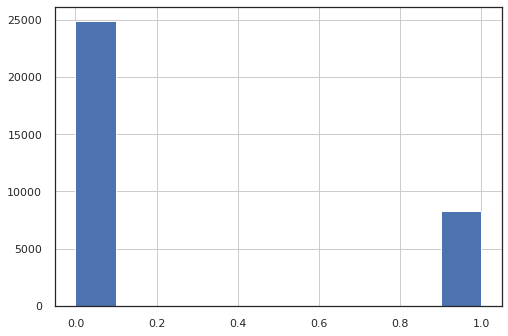

Resultado DummyClassifier 0.7499774103189663
Resultado LogisticRegression 0.9371103280021686
Resultado RidgeClassifier 0.9204843227613626
Resultado DecisionTreeClassifier 0.9050329809343092
Resultado RandomForestClassifier 0.9253636938646427
Resultado SVC 0.9374717628987078


,accuracy_score,tempo_de_treino
tipo,,
DummyClassifier,0.750,0.008
LogisticRegression,0.937,0.069
RidgeClassifier,0.920,0.018
DecisionTreeClassifier,0.905,0.132
RandomForestClassifier,0.925,0.290
SVC,0.937,7.451


In [71]:
# código pronto: rodando para top 25%
test_x, test_y, notas = analisa_classificacao(enem_eda, p=0.75)
# rode a analisa_classificacao e armazene test_x, test_y e notas de 25%
notas[["accuracy_score", "tempo_de_treino"]]

## Plotando a matriz de confusão

Vamos ver quantas vezes os dois principais modelos (Regressão logística e SVC) acertam e erram. Para isso plotaremos a matriz de confusão (código pronto).

In [72]:
# código pronto
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    
    classes = ['Não topo 25%','Topo 25%']

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de confusão normalizada')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe predita')
    plt.tight_layout()
    plt.show()

def print_confusion_for(test_x, test_y, model):
    pred_y = model.predict(test_x)
    print("Acurácia do modelo em teste", model.score(test_x, test_y))
    cnf_matrix = confusion_matrix(test_y, pred_y)

    plot_confusion_matrix(cnf_matrix)


Acurácia do modelo em teste 0.9371103280021686


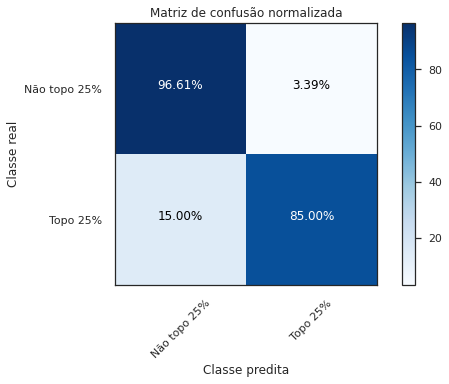

In [73]:
# código pronto
print_confusion_for(test_x, test_y, notas.loc['LogisticRegression']['pipe'])

Acurácia do modelo em teste 0.9374717628987078


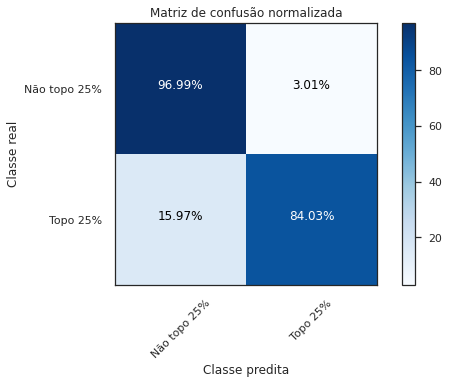

In [74]:
# código pronto
print_confusion_for(test_x, test_y, notas.loc['SVC']['pipe'])

# Vamos validar?

Como o algoritmo de regressão logística simples obteve resultados bons, assim como o de SVC, podemos analisar a matriz de confusão para fazer a escolha. Repare que a regressão logística apresenta maior taxa de acerto no topo 25%, portanto vamos mantê-la.

Como escolhemos uma regressão logística, não possuimos um hiperparâmetro para otimizar, e vamos direto validar o modelo que treinamos. Primeiro separaremos os dados para validação.

In [75]:
# código pronto: separando os dados não usados para treino (que foram os usados em eda)
usados_no_eda = enem_eda.index
a_usar = enem.index.isin(usados_no_eda)
enem_validacao = enem[a_usar]
print("Para otimização temos %d elementos" % len(enem_validacao))
del(a_usar)
del(usados_no_eda)

Para otimização temos 44268 elementos


## Pergunta: separe os dados adequadamente de validação

- implemente a função `separa_dados_de_classificacao_para_validacao`
- X são todas as 3 colunas originais da análise
- Y é o `top_p` indicando se aquele aluno ou aluna está no top 25% baseado em sua `nota_total`
- imprima a média do conjunto Y
- retorne `X, y`

In [76]:
enem_validacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,nota_total
73,629.600,647.900,584.300,480.700,120.000,100.000,120.000,80.000,40.000,2802.500
163,415.100,554.400,512.000,372.400,80.000,120.000,80.000,80.000,120.000,2333.900
239,533.400,412.400,542.500,501.500,120.000,120.000,160.000,160.000,160.000,2709.800
366,659.200,712.900,656.800,816.300,180.000,120.000,160.000,160.000,100.000,3565.200
426,455.000,420.100,513.000,502.300,100.000,120.000,140.000,120.000,120.000,2490.400
...,...,...,...,...,...,...,...,...,...,...
6730095,485.500,565.400,382.700,501.400,100.000,100.000,80.000,100.000,0.000,2315.000
6730186,585.700,383.300,509.600,386.400,100.000,120.000,100.000,60.000,40.000,2285.000
6730376,411.200,441.300,327.900,396.700,0.000,0.000,0.000,0.000,0.000,1577.100
6730397,469.900,561.200,527.000,581.400,100.000,120.000,80.000,80.000,60.000,2579.500


In [77]:
def separa_dados_de_classificacao_para_validacao(dados):
    X = dados[["NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]# selecione as 3 colunas
    y = top_p(dados.nota_total, p=0.75) # calcule o top 25% como 1 o bottom 75% como 0
    print("Média da validação", y.mean())
    return X, y

## Pergunta: defina uma função de validação cruzada de um modelo de classificação

- implemente a função `treina_e_valida_modelo_de_classificacao` que recebe os dados e o modelo
- separe os dados em X e y usando `separa_dados_de_classificacao_para_validacao`
- rode um cross_val_score com o pipe, 5 folds de validação cruzada estratificada
- imprima a acurácia encontrada na validação cruzada
- faça o treinamento do modelo
- imprima a matriz de confusão do `modelo` para `X` e `y`

Dicas:
- na validação cruzada, utilize o parâmetro `verbose=1` pois o processo pode levar alguns minutos
- na validação cruzada, utilize o parâmetro `n_jobs=-1` para usar todos os processadores possíveis de seu computador

In [78]:
# solução
from sklearn.model_selection import cross_val_score

def treina_e_valida_modelo_de_classificacao(dados, modelo):
    # calcule X e y usando a função anterior
    X, y = separa_dados_de_classificacao_para_validacao(dados)
    scores = cross_val_score(modelo, X, y, cv=5, verbose=1, n_jobs=-1) # calcule o cross_val_score
    mean = scores.mean()
    std = scores.std()
    print("Acurácia entre [%.2f,%.2f]" % (100*mean - 2*std, 100*mean + 2*std))
    
    modelo.fit(X, y)
    print_confusion_for(X, y, modelo)

quantile encontrado 2841.625
Média da validação 0.25


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished


Acurácia entre [93.53,93.54]
Acurácia do modelo em teste 0.9356194090539441


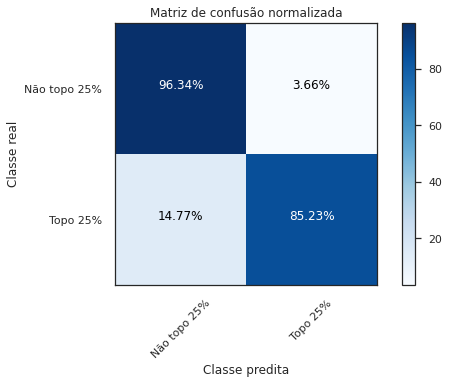

In [79]:
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

## Cross validation e a matriz de confusão

Os dois resultados vão dar uma ideia do quão bom seu modelo será no mundo real.

## Lembrei de uma coisinha...

É **muito** comum no mundo real chegarmos em um resultado pior que nosso baseline. Nesses dados conseguimos um modelo razoável, mas mesmo assim também é **bem** comum, no final do processo de modelagem, lembrar de um outro tipo de modelo de base que poderíamos usar de comparação. Qual heurística simples poderia nos dizer quem vai estar nos top 25%? Repara que essa pergunta deve ser feita **antes** de se começar o projeto. Mas mesmo assim é muito comum somente próximo ao fim do projeto, agora entendendo melhor nosso conjunto de dados, chegar a ideias de heurísticas simples e poderosas que poderiam ser melhores que um modelo complexo. Infelizmente isso também pode acontecer com uma frequencia razoável. Temos que entender que faz parte: testamos heurísticas antes (como o DummyClassifier) e em qualquer momento que vierem a cabeça.

Vamos então testar uma delas?

Se somente sabemos as 3 notas de um aluno ou aluna, será que quem está no top 25% dessas 3 notas serão as pessoas que estarão no top 25% de todas as notas? Parece ser algo razoável de se imaginar como verdadeiro. Vamos então criar o **nosso estimador**! É normal "suar frio" nesse instante, será que a heurística - que parece fazer sentido - será melhor que o modelo?

## Pergunta: Implementando nosso estimador

Vamos implementar uma classe com diversas funções que todos os estimadores devem possuir. Ao treinar nosso estimador ele olha todos os alunos de treino e calcula a nota que separa o top 25%. Ao validar ele usa essa nota: se o aluno ou aluna tem uma nota maior que a nota de corte, é top 25% (1), caso contrário não é (0).

- Implemente a função `fit`. Ela recebe em X as 3 colunas que desejamos somar e deve calcular qual é o quantil de top 25%
- Implemente a função `predict`. Ela recebe X com as 3 colunas, calcula a soma delas e verifica quem está acima do quantil. Quem está acima é classificada como 1, quem está abaixo como 0
- Implemente a função `score`. Ela calcula a acurácia usando a função `accuracy_score` e as predições que o próprio estimador fez
- A função `get_params` não devolve nada uma vez que nosso estimador não possue paramêtros a serem otimizados

In [80]:
# solução: implemente o código que falta
from sklearn.metrics import accuracy_score

class HeuristicaTop25:

    def fit(self, X, y = None):
        if(X.shape[1] != 3):
            print("Erro!!! Estávamos esperando 3 colunas!")
            
        parcial = X.iloc[:, :X.shape[1]-1].sum(axis=1) 
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        parcial = X.iloc[:, :X.shape[1]-1].sum(axis=1)
        y_pred_true_false = parcial > self.top_25_quantile 
        y_pred = y_pred_true_false 
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

quantile encontrado 2841.625
Média da validação 0.25


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


Acurácia entre [89.68,89.73]
top 25 quantile é 1129.90
Acurácia do modelo em teste 0.8960874672449625


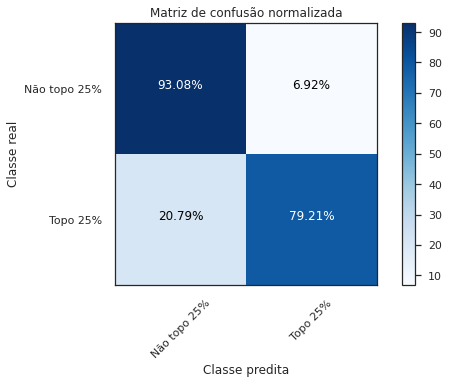

In [81]:
# heurística
enem_validacao = enem_validacao[["nota_total","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
treina_e_valida_modelo_de_classificacao(enem_validacao, HeuristicaTop25())


## Pergunta: Compare os resultados  da acurácia e da matriz de confusão entre (a) heurística final com (b) o DummyClassifier e (c) a LogisticRegression

quantile encontrado 2841.625
Média da validação 0.25
Acurácia entre [62.37,62.38]
Acurácia do modelo em teste 0.6242884250474383


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


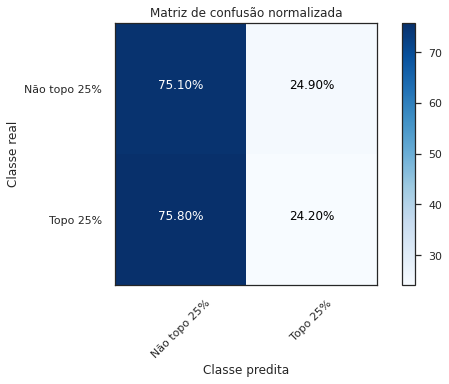

In [82]:
# DummyClassifier
enem_validacao = enem_validacao[["nota_total","NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_COMP3"]]
treina_e_valida_modelo_de_classificacao(enem_validacao, DummyClassifier())

quantile encontrado 2841.625
Média da validação 0.25


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


Acurácia entre [93.53,93.54]
Acurácia do modelo em teste 0.9356194090539441


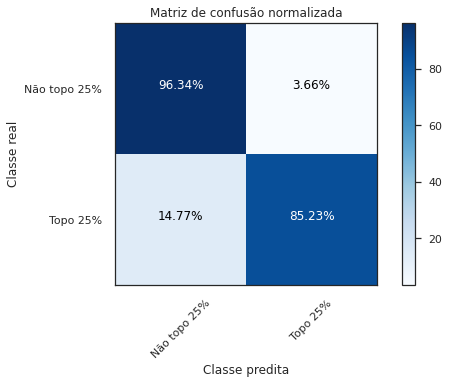

In [83]:
# LogisticRegression
pipeline_logistica = make_pipeline(StandardScaler(), LogisticRegression())
treina_e_valida_modelo_de_classificacao(enem_validacao, pipeline_logistica)

### Solução

Comparando os três resultados, não vemos melhoria ao usar a heurística tampouco usando o dummy classifier. O modelo de regressão logística continua sendo o melhor que geramos até o momento, com a acurácia mais alta  de 93,5% e a maior quantidade de acertos de verdadeiros negativos com a taxa de 96.34% e maior quantidade de acertos de verdadeiros positivos com a taxa de 85.23%.

## Pergunta: Sugira uma outra heurística que poderia ser usada para tentar detectar facilmente o top 25%, sem a necessidade de um modelo complexo

### Solução



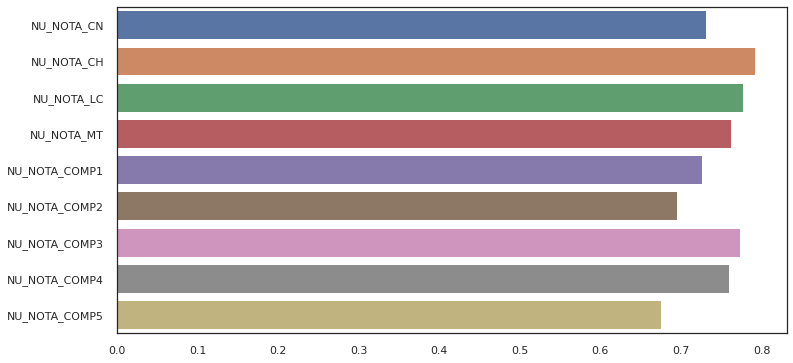

In [84]:
plota_correlacao(correlacao_com_nota_total)   

Pela EDA que fizemos anteriormente sabemos que a variável mais relacionada a nota total é a nota da prova de Ciências Humanas. Sendo assim sugiro a seguinte heurística: verificar se os top 3 da nota de ciências humanas estarão entre os 25% melhores da nota total também.  

In [85]:
# rescreevendo a função separa_dados_de_classificacao_para_validacao
def separa_dados_de_classificacao_para_validacao(dados):
  X = dados[['NU_NOTA_CH']]
  y = top_p(dados.nota_total, p=0.75)
  print("Média da validação", y.mean())
  return X, y

class HeuristicaCH:

    def fit(self, X, y = None):
        if(X.shape[1] != 1):
            print("Erro!!! Estávamos esperando 1 coluna!")
            
        parcial = X.diff().sum(axis=1) 
        self.top_25_quantile = pd.Series(parcial).quantile(0.75)
        print("top 25 quantile é %.2f" % self.top_25_quantile)
        return self

    def predict(self, X, y = None):
        parcial = X.diff().sum(axis=1)
        y_pred_true_false = parcial > self.top_25_quantile 
        y_pred = y_pred_true_false 
        return y_pred

    def score(self, X, y = None):
        return accuracy_score(y, self.predict(X, y))

    def get_params(self, deep=True):
        return {}

quantile encontrado 2839.5
Média da validação 0.2500212909908048


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished


Acurácia entre [76.48,76.54]
top 25 quantile é 79.10
Acurácia do modelo em teste 0.7650220082204685


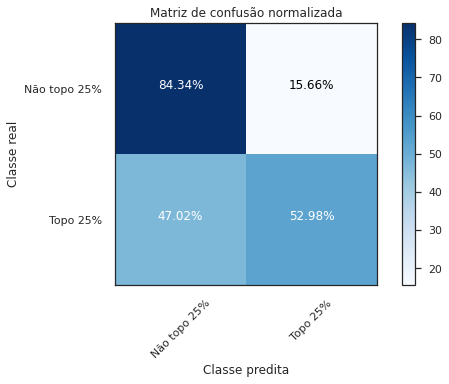

In [88]:
enem_ch = enem[['nota_total', 'NU_NOTA_CH']]
treina_e_valida_modelo_de_classificacao(enem_ch, HeuristicaCH())

Com essa nova heurística temos uma acurácia de 76,5% abaixo da primeira heurística sugerida e também abaixo do melhor modelo de regressão logística encontrado.

## Pergunta: Se uma faculdade oferecer bolsa somente para quem o modelo julgar estar no top 25% o que acontece quando ele julga errôneamente que alguém não está no top 25%? E se julgar errôneamente que está no top 25%?

### Solução

Se guiando pelo nosso melhor modelo (regressão logística) poderão ocorrer injustiças para acesso a bolsa. Este modelo, conforme a matriz de confusão da regressão logística temos a taxa de 14,77% de falsos negativos, ou seja são alunos que deveriam ter acesso a bolsa e são erroneamente classificados como não merecedores da bolsa. Por outro lado temos um baixo número de falsos negativos, com a taxa de 3,66%, é menor a probabilidade deste modelo gerar injustiça de indicar uma bolsa para quem não está entre os 25% com melhor nota. Com isso concluímos que numa próxima iteração do projeto com o objetivo de melhorar o modelo devemos também utilizar e tentar melhorar a métrica **Recall** calculada como $\frac{Verdadeiro Positivo}{Verdadeiro Positivo + Falso Negativo}$ . Esta métrica terá um valor mais alto conforme a quantidade de Falsos Negativos no denominador diminuir.

## Para saber mais

Essa seção serve para instigar sua curiosidade em possíveis caminhos que queira ler e se aprofundar, todos ligados ao projeto atual. Nenhum deles é obrigatório para o projeto em si.

### TRI 

Na prática a prova do Enem já usa métodos estatísticos para entender as dificuldades de suas questões e balanceá-las de diversas maneiras. A Teoria de Resposta ao Item (IRT em inglês) é uma das abordagens usadas para analisar e adaptar questões e provas. No Brasil diversas empresas e startups usam a tecnologia para entender as dificuldades e facilidades que pessoas possuem, com o objetivo de otimizar o estudo das mesmas.

### E no ano seguinte?

Devido ao TRI podemos esperar uma certa uniformidade entre provas aplicadas em anos diferentes. Mas fica a questão: estamos treinando agora nosso modelo com X% dos alunos que fizeram a prova em um ano X, portanto precisaríamos que X% dos alunos fizessem a prova completa para termos um modelo capaz de julgar somente a partir das provas parciais: não removemos a necessidade de criação da prova. Imaginando que grande parte do custo está na distribuição e correção manual da redação, existe muita margem para otimização.

Uma outra abordagem seria treinar o modelo nos dados de um ano anterior a X e ver se o modelo se comporta bem para todos os anos posteriores. Repare como a definição do processo de separação dos dados de treino (por %? por ano?) e de validação faz muita diferença em entender como podemos usar o modelo no mundo real.

### 25%?

Nossa heurística envolveu usar o top 25%, mas poderíamos testar com os top 30% das notas parciais se seriam os top 25% das notas totais. Estaríamos errando mais para um lado do que para o outro, e isso pode ser aceitável por nosso cliente. Poderíamos continuar com a modelagem, criando um hiper parâmetro em nosso modelo e tentando otimizá-lo, por exemplo, a medida que conversamos com a empresa cliente

### Redes neurais

Neste projeto não usamos redes neurais (TensorFlow, Keras, Pytorch etc) mas é outro tipo de classificador, assim como AdaBoost e outros que poderiam ser utilizados. Como o conjunto de dados é bem grande e o relacionamento entre as notas é linear (sabemos que a nota total é a soma das notas parciais, mas não sabemos a relação entre as notas que não usamos), os modelos mais simples foram capazes de pegar boa parte do padrão encontrando nos resultados finais.


### Classes balanceadas

Se usamos 75% e 25% existe um desbalanceamento das classes e isso bagunça nossas métricas e análises. O mesmo ocorreria com 3 ou mais classes distintas. Existem diversas abordagens para tentar corrigir isso. Uma delas é simplesmente remover parte dos dados da classe que está aparecendo "demais". Isto é, dos 75%, joga uma parte aleatória fora (ou usa outros métodos para criar/remover samples). O código a seguir é um exemplo de como balancear através de jogar fora dados aleatoriamente. Dado os dados já com a coluna `top_p` ele vai balancear para 50% 50% as classes:

```
from imblearn.under_sampling import RandomUnderSampler

def random_under_sampler(dados):
    X = dados.drop('top_p', axis=1)
    y = dados['top_p']
    X_under, y_under = RandomUnderSampler(random_state=0).fit_resample(X, y)
    X_under = pd.DataFrame(X_under, columns=X.columns)
    X_under['top_p'] = y_under
    return X_under
```

Teríamos que levar em consideração que o DummyClassifier passaria a acertar agora somente 50% dos casos, pois as duas classes aparecem proporcionalmente.

# Parabéns, você concluiu o projeto da Alura!